In [31]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels as sm
%matplotlib inline


In [2]:
wine = ('./wine-reviews/winemag-data_first150k.csv')

In [3]:
df = pd.read_csv(wine)

In [54]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [55]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [57]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [58]:
df.shape

(150930, 11)

In [59]:
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [105]:
df.columns.unique()

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [98]:
df.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'], dtype=object)

In [99]:
df.variety.unique()

array(['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc',
       'Pinot Noir', 'Provence red blend', 'Friulano', 'Tannat',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Rosé', 'Tempranillo Blend',
       'Syrah', 'Mavrud', 'Sangiovese', 'Sparkling Blend',
       'Rhône-style White Blend', 'Red Blend', 'Mencía', 'Palomino',
       'Petite Sirah', 'Riesling', 'Cabernet Sauvignon-Syrah',
       'Portuguese Red', 'Nebbiolo', 'Pinot Gris', 'Meritage', 'Baga',
       'Glera', 'Malbec-Merlot', 'Merlot-Malbec', 'Ugni Blanc-Colombard',
       'Viognier', 'Cabernet Sauvignon-Cabernet Franc', 'Moscato',
       'Pinot Grigio', 'Cabernet Franc', 'White Blend', 'Monastrell',
       'Gamay', 'Zinfandel', 'Greco', 'Barbera', 'Grenache',
       'Rhône-style Red Blend', 'Albariño', 'Malvasia Bianca', 'Assyrtiko',
       'Malagouzia', 'Carmenère', 'Bordeaux-style Red Blend',
       'Touriga Nacional', 'Agiorgitiko', 'Picpoul', 'Godello',
       'Gewürztraminer', 'Merlot', 'Syrah-Grenache', 'G-S-M

In [101]:
df.province.unique()

array(['California', 'Northern Spain', 'Oregon', 'Provence',
       'Northeastern Italy', 'Southwest France', 'Kumeu', 'Washington',
       'Bulgaria', 'Tuscany', 'France Other', 'Rhône Valley', 'Galicia',
       'Andalucia', 'Idaho', 'Burgundy', 'Loire Valley', 'New York',
       'Mendoza Province', 'Victoria', 'Alentejano', 'Piedmont',
       'Alentejo', 'Champagne', 'Upper Galilee', 'Beira Atlantico',
       'Veneto', 'Douro', 'Tejo', 'Stellenbosch', 'Levante',
       'Sicily & Sardinia', 'Southern Italy', 'Languedoc-Roussillon',
       'Bordeaux', 'Atalanti Valley', 'Catalonia', 'Santorini', 'Florina',
       'Marchigue', 'Colchagua Valley', 'Curicó Valley', 'Nemea',
       'Maule Valley', 'Alsace', 'Guerrouane', 'Colinele Dobrogei',
       'Central Spain', 'Vinho Verde', 'Mosel', 'Rheinhessen',
       'Golan Heights', 'Württemberg', 'Ahr', 'British Columbia',
       'Moldova', 'Spain Other', 'Sopron', 'Other', 'Walker Bay', 'Dão',
       'Italy Other', 'Duriense', 'Ontario', 'Beir

In [61]:
df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


In [62]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [63]:
df['points'].astype(float)

0         96.0
1         96.0
2         96.0
3         96.0
4         95.0
5         95.0
6         95.0
7         95.0
8         95.0
9         95.0
10        95.0
11        95.0
12        95.0
13        95.0
14        95.0
15        95.0
16        95.0
17        95.0
18        95.0
19        95.0
20        95.0
21        95.0
22        95.0
23        95.0
24        95.0
25        94.0
26        94.0
27        94.0
28        94.0
29        94.0
          ... 
150900    81.0
150901    81.0
150902    81.0
150903    81.0
150904    81.0
150905    80.0
150906    93.0
150907    92.0
150908    90.0
150909    89.0
150910    89.0
150911    87.0
150912    87.0
150913    94.0
150914    94.0
150915    93.0
150916    93.0
150917    92.0
150918    92.0
150919    91.0
150920    91.0
150921    91.0
150922    91.0
150923    91.0
150924    91.0
150925    91.0
150926    91.0
150927    91.0
150928    90.0
150929    90.0
Name: points, Length: 150930, dtype: float64

In [64]:
df['price'].astype(float)

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
5          73.0
6          65.0
7         110.0
8          65.0
9          60.0
10         80.0
11         48.0
12         48.0
13         90.0
14        185.0
15         90.0
16        325.0
17         80.0
18        290.0
19         75.0
20         24.0
21         79.0
22        220.0
23         60.0
24         45.0
25         57.0
26         62.0
27        105.0
28         60.0
29         60.0
          ...  
150900     13.0
150901     12.0
150902     10.0
150903      7.0
150904     10.0
150905     13.0
150906     65.0
150907     52.0
150908     65.0
150909     52.0
150910     38.0
150911     37.0
150912     65.0
150913     30.0
150914     25.0
150915     30.0
150916     65.0
150917     30.0
150918     38.0
150919     37.0
150920     19.0
150921     38.0
150922      NaN
150923     30.0
150924     70.0
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150

In [95]:
points_mean = np.mean(df.points)
round(points_mean,2)

87.89

In [96]:
price_mean = np.mean(df.price)
round(price_mean,2)

33.13

In [86]:
df.price.max()

2300.0

In [87]:
df.price.min()

4.0

In [88]:
price_above_mean = df[df['price'] > price_mean]
price_above_mean.count()

Unnamed: 0     45371
country        45371
description    45371
designation    36394
points         45371
price          45371
province       45371
region_1       41045
region_2       24013
variety        45371
winery         45371
dtype: int64

In [89]:
price_below_mean = df[df['price'] < price_mean]
price_below_mean.count()

Unnamed: 0     91864
country        91859
description    91864
designation    58530
points         91864
price          91864
province       91859
region_1       73348
region_2       36691
variety        91864
winery         91864
dtype: int64

In [90]:
points_above_mean = df[df['price'] > points_mean]
points_above_mean.count()

Unnamed: 0     5617
country        5617
description    5617
designation    4654
points         5617
price          5617
province       5617
region_1       5134
region_2       1722
variety        5617
winery         5617
dtype: int64

In [91]:
points_below_mean = df[df['price'] < points_mean]
points_below_mean.count()

Unnamed: 0     131618
country        131613
description    131618
designation     90270
points         131618
price          131618
province       131613
region_1       109259
region_2        58982
variety        131618
winery         131618
dtype: int64

In [92]:
np.mean(df.points)

87.8884184721394

In [79]:
np.median(df.points)

88.0

In [80]:
df.points.max()

100

In [81]:
df.points.min()

80

(array([  2400.,  10089.,  23119.,  36320.,  30792.,  26509.,  15258.,
          5178.,   1060.,    205.]),
 array([  80.,   82.,   84.,   86.,   88.,   90.,   92.,   94.,   96.,
          98.,  100.]),
 <a list of 10 Patch objects>)

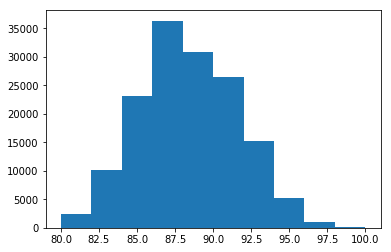

In [82]:
plt.hist(df.points)

In [83]:
df[['winery', 'country', 'points']][df['points'] > 80].sort_values(by = 'points', ascending = False).head(50)

,winery,country,points
137099,Cardinale,US,100
19354,Cayuse,US,100
114272,Sloan,US,100
143522,Sloan,US,100
92916,Shafer,US,100
138867,Avignonesi,Italy,100
84035,Chambers Rosewood Vineyards,Australia,100
119521,Tenuta dell'Ornellaia,Italy,100
28954,Giovanni Chiappini,Italy,100
78004,Giovanni Chiappini,Italy,100


In [34]:
null_release_mask = df['designation'].isnull()
df[null_release_mask].sor

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
36,36,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes
37,37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
48,48,Italy,"Ripe dark-skinned berry, forest floor and cook...",NaN,90,50.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Brunelli Martoccia
49,49,US,"The aromas of blue fruit, herbs and spice are ...",NaN,90,40.0,Washington,Red Mountain,Columbia Valley,Cabernet Sauvignon,Canvasback
51,51,France,"This structured, complex Chardonnay is packed ...",NaN,90,68.0,Burgundy,Chassagne-Montrachet,NaN,Chardonnay,Chartron et Trébuchet
54,54,US,There's a lot to like in this nicely priced wh...,NaN,90,18.0,California,Russian River Valley,Sonoma,Chardonnay,De Loach
61,61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.0,Victoria,Mornington Peninsula,NaN,Pinot Noir,Moorooduc
64,64,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim
71,71,US,This wine draws from a handful of tremendous v...,NaN,91,45.0,California,Sonoma Coast,Sonoma,Pinot Noir,Red Car
